In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from mlflow.recipes import Recipe
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [10]:
r = Recipe(profile="local")

2022/12/15 09:03:29 INFO mlflow.recipes.recipe: Creating MLflow Recipe 'mlflow-recipes' with profile: 'local'


In [15]:
r.clean()

In [16]:
r.inspect()

In [17]:
r.run("ingest")

2022/12/15 09:05:55 INFO mlflow.recipes.step: Running step ingest...
Loading dataset CSV using `pandas.read_csv()` with default arguments and assumed index column 0 which may not produce the desired schema. If the schema is not correct, you can adjust it by modifying the `load_file_as_dataframe()` function in `steps/ingest.py`
Loading dataset CSV using `pandas.read_csv()` with default arguments and assumed index column 0 which may not produce the desired schema. If the schema is not correct, you can adjust it by modifying the `load_file_as_dataframe()` function in `steps/ingest.py`


name,type
fixed acidity,number
volatile acidity,number
citric acid,number
residual sugar,number
chlorides,number
free sulfur dioxide,number
total sulfur dioxide,number
density,number
pH,number
sulphates,number


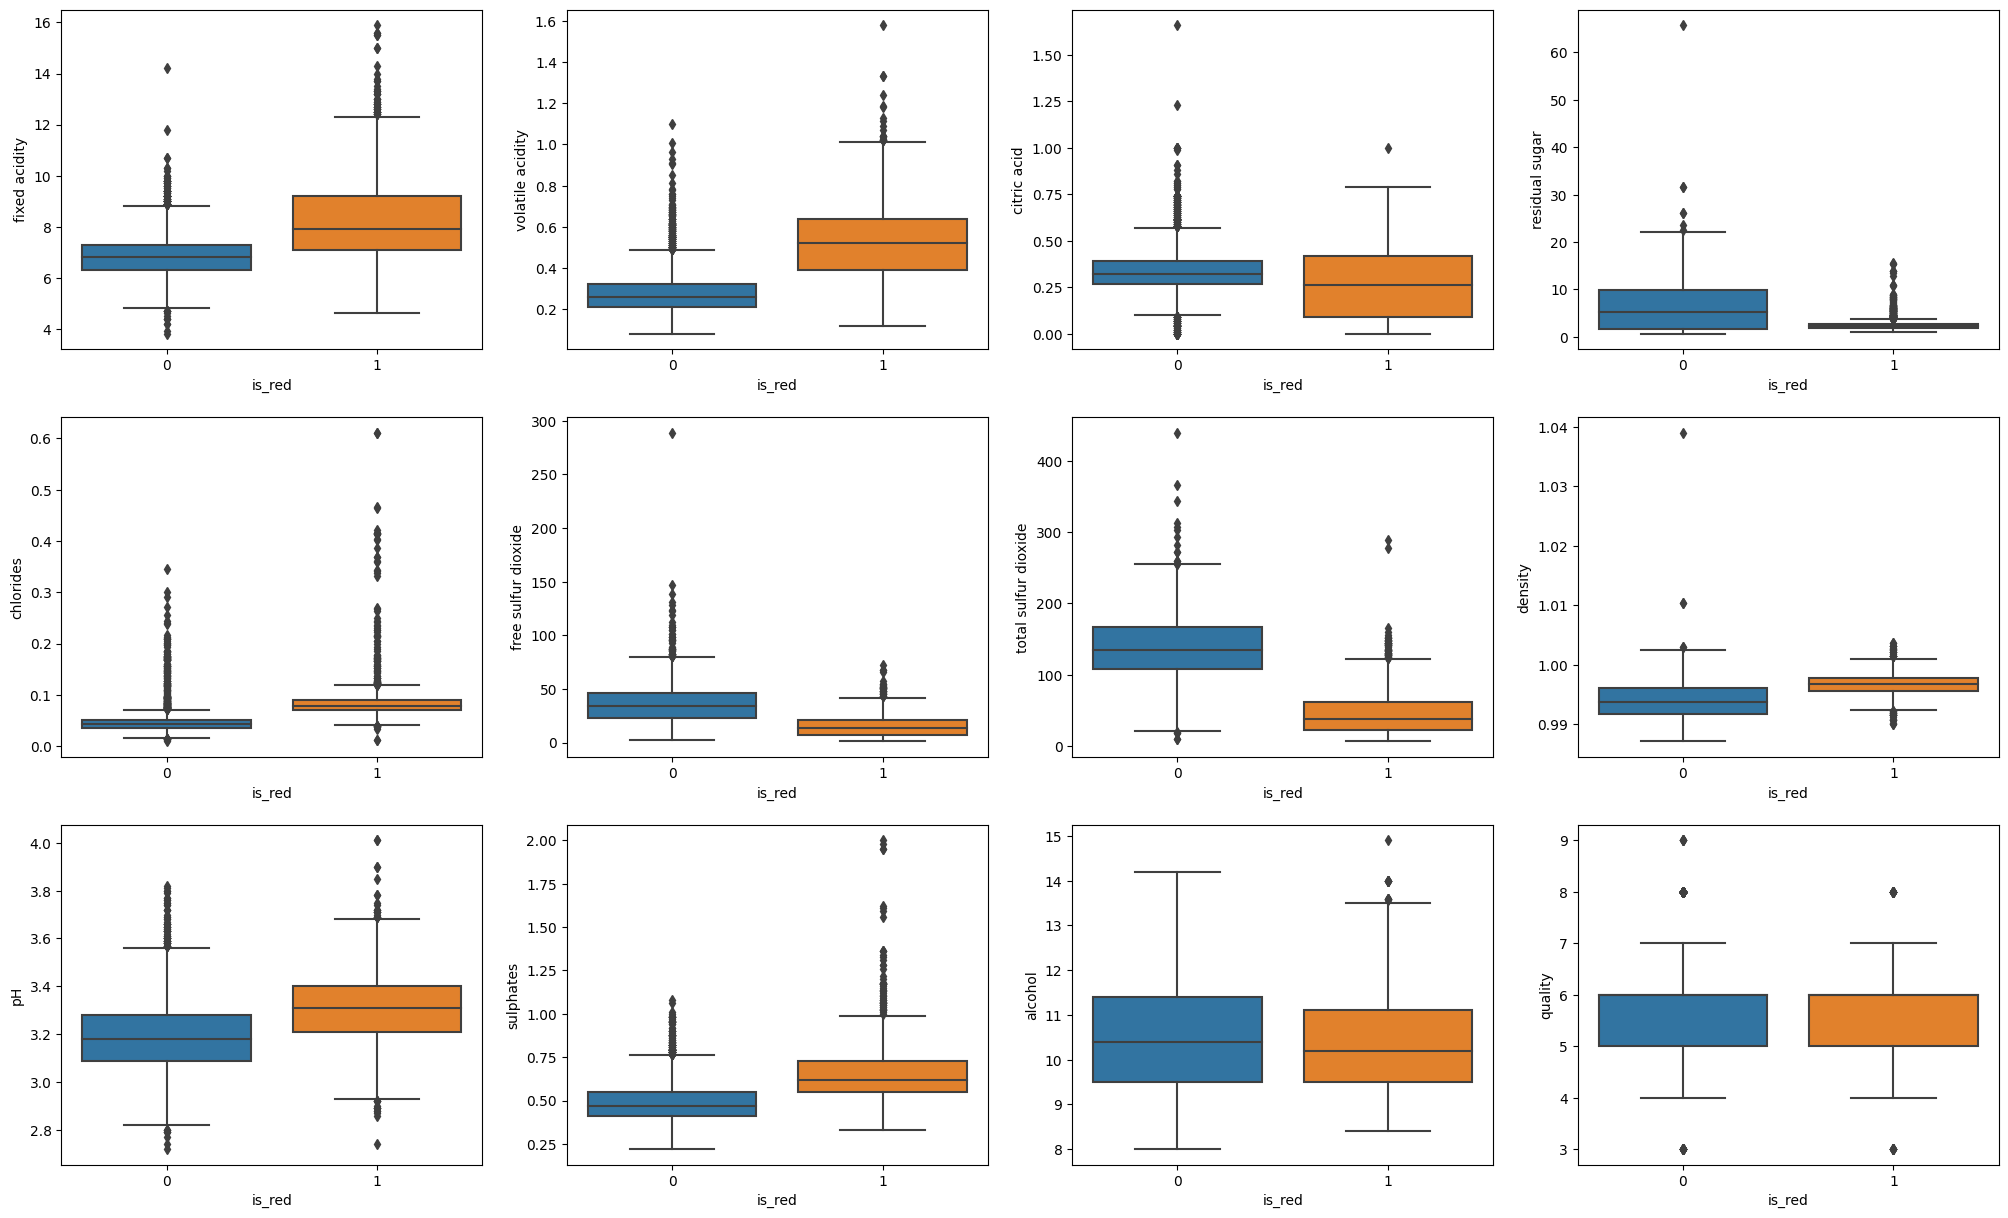

In [18]:
# Perform some EDA on the ingested dataset.
ingested_data = r.get_artifact("ingested_data")

dims = (3, 4)

f, axes = plt.subplots(dims[0], dims[1], figsize=(25, 15))
axis_i, axis_j = 0, 0
for col in ingested_data.columns:
  if col == "is_red":
    continue  # Box plots cannot be used on indicator variables
  sns.boxplot(x=ingested_data["is_red"],
              y=ingested_data[col], ax=axes[axis_i, axis_j])
  axis_j += 1
  if axis_j == dims[1]:
    axis_i += 1
    axis_j = 0


In [19]:
r.run("split")


2022/12/15 09:06:51 INFO mlflow.recipes.utils.execution: ingest: No changes. Skipping.


2022/12/15 09:06:53 INFO mlflow.recipes.step: Running step split...


In [20]:
r.run("transform")


2022/12/15 09:07:54 INFO mlflow.recipes.utils.execution: ingest, split: No changes. Skipping.


2022/12/15 09:07:55 INFO mlflow.recipes.step: Running step transform...


Name,Type
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [21]:
r.run("train")


2022/12/15 09:08:02 INFO mlflow.recipes.utils.execution: ingest, split, transform: No changes. Skipping.


2022/12/15 09:08:04 INFO mlflow.recipes.step: Running step train...
2022/12/15 09:08:05 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2022/12/15 09:08:05 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d

Metric,training,validation
f1_score,0.881188,0.868613
accuracy_score,0.933641,0.940496
example_count,4340,605
false_negatives,234,27
false_positives,54,9
precision_score,0.951872,0.929688
recall_score,0.820276,0.815068
score,0.933641,0.940496
true_negatives,2984,450
true_positives,1068,119


In [22]:
r.run("evaluate")


2022/12/15 09:10:20 INFO mlflow.recipes.utils.execution: ingest, split, transform, train: No changes. Skipping.


2022/12/15 09:10:22 INFO mlflow.recipes.step: Running step evaluate...
2022/12/15 09:10:24 INFO mlflow.models.evaluation.base: Evaluating the model with the default evaluator.
2022/12/15 09:10:24 INFO mlflow.models.evaluation.default_evaluator: The evaluation dataset is inferred as binary dataset, positive label is 1, negative label is 0.
2022/12/15 09:10:27 INFO mlflow.models.evaluation.default_evaluator: Shap explainer _PatchedKernelExplainer is used.

100%|██████████| 10/10 [00:01<00:00,  7.57it/s]
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
2022/12/15 09:10:34 INFO mlflow.models.evaluation.base: Evaluating the model with the default evaluator.
2022/12/15 09:10:34 INFO mlflow.models.evaluation.default_evaluator: The evaluation dataset is inferred as binary dataset, positive label is 1, negative label is 0.


Metric,validation,test
f1_score,0.868613,0.834532
accuracy_score,0.940496,0.925566
example_count,605,618.000000
false_negatives,27,35.000000
false_positives,9,11.000000
precision_score,0.929688,0.913386
recall_score,0.815068,0.768212
score,0.940496,0.925566
true_negatives,450,456.000000
true_positives,119,116.000000


In [23]:
r.run("register")


2022/12/15 09:11:06 INFO mlflow.recipes.utils.execution: ingest, split, transform, train, evaluate: No changes. Skipping.


2022/12/15 09:11:08 INFO mlflow.recipes.step: Running step register...
Successfully registered model 'red_wine_classifier'.
2022/12/15 09:11:09 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: red_wine_classifier, version 1
Created version '1' of model 'red_wine_classifier'.


In [24]:
r.inspect("train")


Metric,training,validation
f1_score,0.881188,0.868613
accuracy_score,0.933641,0.940496
example_count,4340,605
false_negatives,234,27
false_positives,54,9
precision_score,0.951872,0.929688
recall_score,0.820276,0.815068
score,0.933641,0.940496
true_negatives,2984,450
true_positives,1068,119


In [25]:
training_data = r.get_artifact("training_data")
training_data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000
mean,7.215520,0.341091,0.317869,5.499270,0.056097,30.556219,115.929750,0.994712,3.218466,0.531083,10.498774,5.825370,0.246871
std,1.277315,0.165753,0.143888,4.798543,0.035201,17.859117,56.780264,0.003020,0.160984,0.149387,1.197846,0.872072,0.431232
min,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992352,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.410000,0.390000,8.200000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.600000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.200000,9.000000,1.000000


In [26]:
trained_model = r.get_artifact("model")
print(trained_model)


mlflow.pyfunc.loaded_model:
  artifact_path: train/model
  flavor: mlflow.sklearn
  run_id: 24f2ad02fd7a4ed1abc8e160a1c1c4a5

